In [1]:
from IPython.display import Image

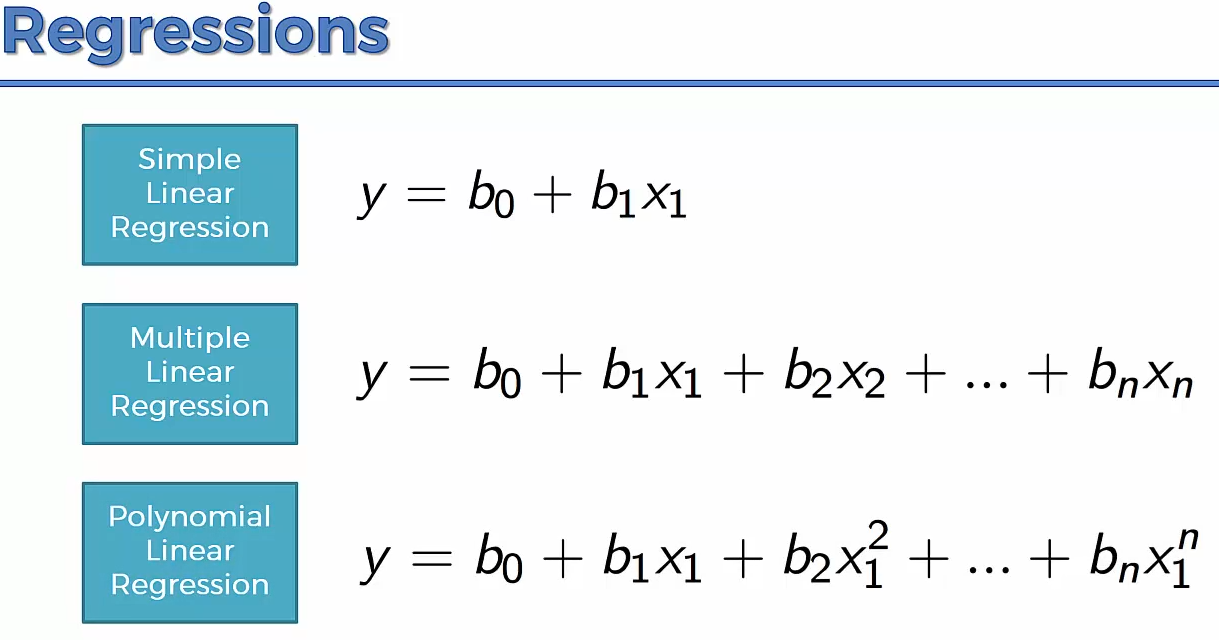

In [2]:
Image("Images/TypesOfRegression.PNG")

In [3]:
"""
In Multiple Linear Regression we had, X1, X2, X3, ..
But, In Polynomial Linear Regression we have X1, X1*X1, X1*X1*X1, ...
"""

'\nIn Multiple Linear Regression we had, X1, X2, X3, ..\nBut, In Polynomial Linear Regression we have X1, X1*X1, X1*X1*X1, ...\n'

In [4]:
#In Multiple Linear Regression we had graph and we were finding a optimum straight linear line like following,

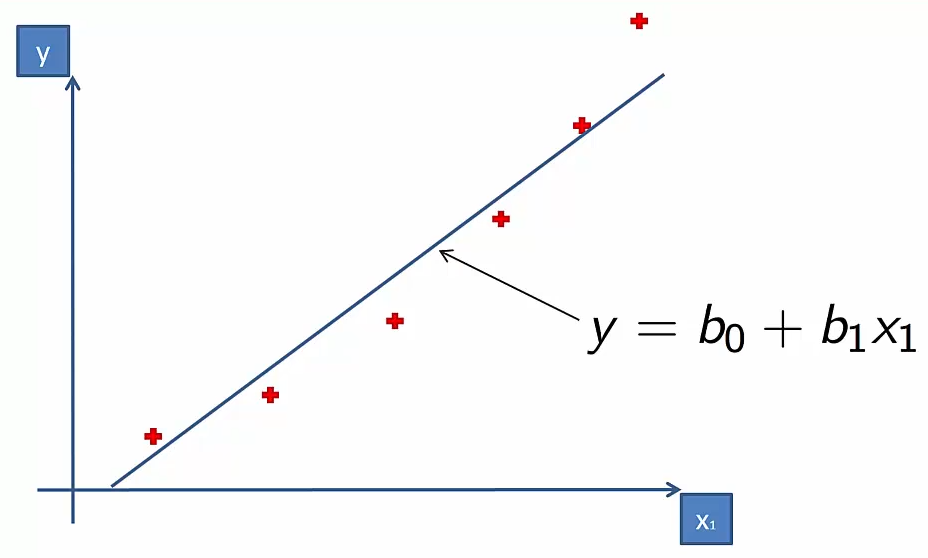

In [5]:
Image( "Images/MultipleLinearRegressionGraph.PNG" )

In [6]:
#And In Polynomial Linear Regression we have graph and we are going to find the optimum Poly line,

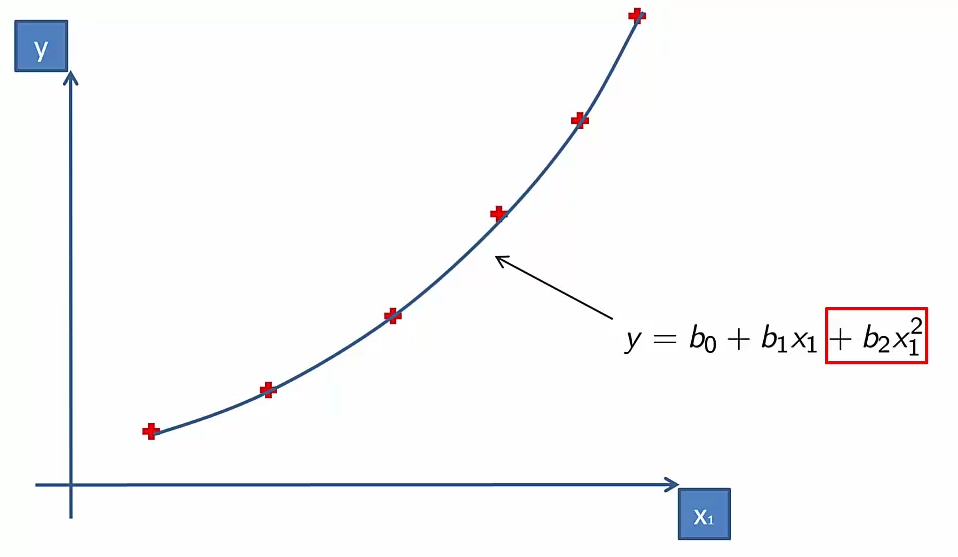

In [7]:
Image( "Images/PolynomialLinearRegressionGraph.PNG")

In [8]:
import pandas as pd

In [12]:
data = pd.read_csv( "DataSet/Position_Salaries.csv" )
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [13]:
data.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [14]:
data.shape

(10, 3)

In [15]:
x =  data.loc[ :, 'Level' ]
x

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Level, dtype: int64

In [16]:
y =  data.loc[ :, 'Salary' ]
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

In [17]:
import matplotlib.pyplot as plt

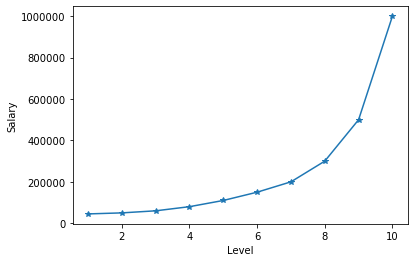

In [18]:
plt.plot( x, y, marker = '*' )
plt.xlabel('Level')
plt.ylabel( 'Salary' )
plt.show()

In [19]:
#So, we can see now We are getting a Polynomial graph,
#Now the situation is like Salary is dependent on Level and we will be giving levels as input and our job is to find the Salary.
#So, In this case we are supposed to apply Polynomial regression

In [20]:
#We are going to perform both Linear Regression and Polynomial Regression and then, we will see the diffrence between both types

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()

In [24]:
lr.fit( x, y )

ValueError: Expected 2D array, got 1D array instead:
array=[ 1  2  3  4  5  6  7  8  9 10].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [25]:
x = pd.DataFrame( x )

In [26]:
lr.fit( x, y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
lr_y_pred = lr.predict( x )
lr_y_pred

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

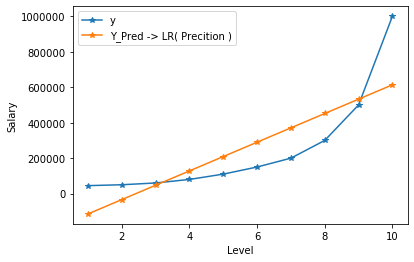

In [30]:
plt.plot( x, y, marker = '*', label = 'y' )
plt.plot( x, lr_y_pred, marker = '*', label = 'Y_Pred -> LR( Precition )' )
plt.xlabel('Level')
plt.ylabel( 'Salary' )
plt.legend()
plt.show()

In [32]:
lr.score( x, y )

0.6690412331929895

In [33]:
#Now, we have to Perform Polynomial Regression

In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
pf = PolynomialFeatures( degree = 4 )

In [53]:
pf.fit_transform( x )                  #Change the degree and see the changes -> 1, 2, 3, 4,...

#fit_transform() will change the x value.

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [54]:
transformed_x = pf.fit_transform( x )

In [55]:
transformed_x

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [58]:
lr2 = LinearRegression()

In [59]:
lr2.fit( transformed_x, y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
lr2_y_pred = lr2.predict( transformed_x )
lr2_y_pred

array([ 53356.64335675,  31759.90675984,  58642.1911421 ,  94632.86713282,
       121724.94172495, 143275.05827509, 184003.49650352, 289994.17249417,
       528694.63869462, 988916.08391613])

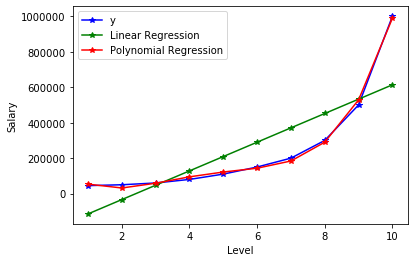

In [62]:
plt.plot( x, y, marker = '*', color = 'blue', label = 'y' )                      #Given Data
plt.plot( x, lr_y_pred, marker = '*', color = 'green', label = 'Linear Regression' )    #Simple Linear Regression
plt.plot( x, lr2_y_pred, marker = '*', color = 'red', label = 'Polynomial Regression' )     #Polynomial Regression
plt.xlabel('Level')
plt.ylabel( 'Salary' )
plt.legend()
plt.show()

In [92]:
correct = 0 
incorrect = 0

sum = 0
for i in y:
    sum = sum + i
    
mean = sum/len(y)
print( f"Before Mean = { mean }" )
mean = mean/10
print( f"After Mean = { mean }" )


for i in range( 0, len( y ) ):
    print( f"i = { i }, y[i] = { y[i] } and lr2_y_pred = { lr2_y_pred[i] }" )
    
    diff = lr2_y_pred[i] - y[i]
    
    if( diff <0 ):
        diff = diff * -1
    
    if( diff <= 24950 ):
        correct = correct + 1
    else:
        incorrect = incorrect + 1

print( f"Correct = { correct }" )
print( f"InCorrect = { incorrect }" )
print( f"Accuracy = { correct/len(y) }" )

Before Mean = 249500.0
After Mean = 24950.0
i = 0, y[i] = 45000 and lr2_y_pred = 53356.64335675165
i = 1, y[i] = 50000 and lr2_y_pred = 31759.906759843114
i = 2, y[i] = 60000 and lr2_y_pred = 58642.19114210241
i = 3, y[i] = 80000 and lr2_y_pred = 94632.86713282065
i = 4, y[i] = 110000 and lr2_y_pred = 121724.94172494742
i = 5, y[i] = 150000 and lr2_y_pred = 143275.05827509193
i = 6, y[i] = 200000 and lr2_y_pred = 184003.49650352309
i = 7, y[i] = 300000 and lr2_y_pred = 289994.17249417165
i = 8, y[i] = 500000 and lr2_y_pred = 528694.6386946221
i = 9, y[i] = 1000000 and lr2_y_pred = 988916.0839161281
Correct = 9
InCorrect = 1
Accuracy = 0.9
